# Imports

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load and Visualize Data

In [105]:
df = pd.read_csv('../data/scored_notes.tsv', sep='\t')
notes = pd.read_csv("../data/notes-00000.tsv", sep='\t')

/var/folders/1p/h191j1g97h7fp_g5rwt17vrr0000gp/T/ipykernel_37251/2125769971.py:1: DtypeWarning: Columns (7,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/scored_notes.tsv', sep='\t')
/var/folders/1p/h191j1g97h7fp_g5rwt17vrr0000gp/T/ipykernel_37251/2125769971.py:2: DtypeWarning: Columns (5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  notes = pd.read_csv("../data/notes-00000.tsv", sep='\t')


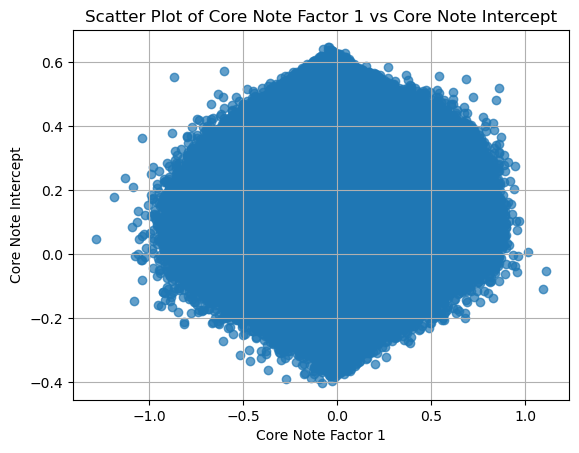

In [106]:
# Core plot
plt.figure()
plt.scatter(df['coreNoteFactor1'], df['coreNoteIntercept'], alpha=0.7)
plt.title('Scatter Plot of Core Note Factor 1 vs Core Note Intercept')
plt.xlabel('Core Note Factor 1')
plt.ylabel('Core Note Intercept')
plt.grid(True)
plt.show()

# Data Analysis

In [107]:
print(f"Number of datapoints in core note factors: {df['coreNoteFactor1'].count()}")
print(f"Number of datapoints in core note intercepts: {df['coreNoteIntercept'].count()}")

Number of datapoints in core note factors: 521530
Number of datapoints in core note intercepts: 521530


## Most Helpful Notes

In [108]:
data_helpful = df.loc[(df["coreNoteIntercept"] >= 0.4) & (df["coreNoteFactor1"] > -0.5) & (df["coreNoteFactor1"] < 0.5)].copy()

In [109]:
relevant_data_helpful = notes[["noteId", "summary"]].copy()

In [110]:
len(relevant_data_helpful)

713555

In [111]:
results_helpful = data_helpful.merge(right=relevant_data_helpful, on=["noteId"], how="left")

In [112]:
results_helpful_condensed = relevant_data_helpful.loc[relevant_data_helpful["noteId"].isin(data_helpful["noteId"])]
results_helpful_condensed

,noteId,summary
6,1599066819402162177,"This tweet is a personal opinion, presumably a..."
58,1617041513506082818,Waving a flashlight from side to side is a sig...
60,1627010542673006594,Dr Edmiston is listed as an author of a chapte...
67,1659259380091559943,"The woman in this video, through her lawyer, h..."
68,1659260017361526794,"The woman in this video, through her lawyer, h..."
...,...,...
713450,1771960359437345170,This is not Lewis Hamilton. Lewis Hamilton is ...
713451,1760936161583726863,"This is a WEB 3.0 (Crypto, nft) ad. Be warned..."
713483,1770522172949209287,"This post serves as a stealth promotion, which..."
713526,1774094100481900823,Dit is een politie auto met getinte achterruit...


In [74]:
results_helpful_condensed.sample(n=100).to_csv("helpful.tsv", sep="\t")

## Unhelpful Notes

In [113]:
data_unhelpful = df.loc[(df["coreNoteIntercept"] <= -0.08) & (df["coreNoteFactor1"] > -0.5) & (df["coreNoteFactor1"] < 0.5)].copy()

In [114]:
relevant_data_unhelpful = notes[["noteId", "summary"]].copy()

In [115]:
len(relevant_data_unhelpful)

713555

In [116]:
results_unhelpful = data_unhelpful.merge(right=relevant_data_unhelpful, on=["noteId"], how="left")

In [117]:
results_unhelpful_condensed = relevant_data_unhelpful.loc[relevant_data_unhelpful["noteId"].isin(data_unhelpful["noteId"])]
results_unhelpful_condensed

,noteId,summary
59,1621516425348419585,"It costs $3,600 to plant a tree in New York Ci..."
86,1638842366684721157,アニメの画像を添付する事で、あたかもちびまる子ちゃんのなかであった会話だと誤認させようとしている。
101,1534602964295221249,This tweet attempts to conflate things said by...
190,1647626345483055105,User recently confirmed they were banned from ...
200,1727940249454534919,I recall the PM being verbally attacked by the...
...,...,...
713500,1767821006729863452,"Although it's satire, I fucking hate mark gold..."
713502,1768373582391058579,&quot;Erm... Actually Hicox made the gesture w...
713512,1768354289913602071,"While it’s good as joke, I would want to avoid..."
713521,1774023615467409747,Russia does say the terrorists were travelling...


In [80]:
results_unhelpful_condensed.sample(n=100).to_csv("unhelpful.tsv", sep="\t")

## Polarized Left


In [118]:
data_polarized_left = df.loc[(df["coreNoteIntercept"] >= -0.08) & (df["coreNoteIntercept"] <= 0.4) & (df["coreNoteFactor1"] >= 0.5)].copy()

In [119]:
relevant_data_polarized_left = notes[["noteId", "summary"]].copy()

In [120]:
len(relevant_data_polarized_left)

713555

In [121]:
results_polarized_left = data_polarized_left.merge(right=relevant_data_polarized_left, on=["noteId"], how="left")

In [122]:
results_polarized_left_condensed = relevant_data_polarized_left.loc[relevant_data_polarized_left["noteId"].isin(data_polarized_left["noteId"])]
results_polarized_left_condensed

,noteId,summary
29,1671604373598900225,The author explains that he altered the text o...
35,1763035751002808656,"While a Republican Senator, Cindy Hyde-Smith i..."
44,1591099606531710986,Elon tweeted that this claim was &quot;False&q...
76,1660026721410727936,Receipts provided by the woman's lawyer did no...
113,1767519454848540844,Ongoing statements that it's time to &quot;tax...
...,...,...
713458,1774101782731350374,The rotation of Easter is irrelevant. It clear...
713499,1767186539766002115,NNN- Go farm your writing points somewhere els...
713522,1774026409939177558,Bill Maher's main point is the lack of discuss...
713534,1774831716357542026,Shifa Hospital was the was been used to hide t...


In [86]:
results_polarized_left_condensed.sample(n=100).to_csv("polarized_left.tsv", sep="\t")

## Polarized Right

In [123]:
data_polarized_right = df.loc[(df["coreNoteIntercept"] >= -0.08) & (df["coreNoteIntercept"] <= 0.4) & (df["coreNoteFactor1"] <= -0.5)].copy()

In [124]:
relevant_data_polarized_right = notes[["noteId", "summary"]].copy()

In [125]:
len(relevant_data_polarized_right)

713555

In [126]:
results_polarized_right = data_polarized_right.merge(right=relevant_data_polarized_right, on=["noteId"], how="left")

In [127]:
results_polarized_right_condensed = relevant_data_polarized_right.loc[relevant_data_polarized_right["noteId"].isin(data_polarized_right["noteId"])]
results_polarized_right_condensed

,noteId,summary
5,1586769867381669889,"Clinton is not alone in this claim, the F.B.I...."
9,1535128588818653184,This refers to the January 6th hearing. Which ...
38,1550490344223084546,Oral testimony under oath does constitute fact...
83,1748727401662562515,"Dryden Mitchell, the lead singer of Alien Ant ..."
100,1684828766294409216,HS:n juttu on normaalia journalismia. Jutun ki...
...,...,...
713509,1770101624574267476,This is an cover for a OF advertisement. Othe...
713528,1774759736618991919,Roken is schadelijk voor de gezondheid. Elk ...
713529,1770672232295227898,The CDC link states chronic AND mental health ...
713541,1774545169116692794,This is no evidence suggesting Michelle Obama ...


In [128]:
results_polarized_right_condensed.sample(n=100).to_csv("polarized_right.tsv", sep="\t")

## Center

In [129]:
data_center = df.loc[(df["coreNoteIntercept"] >= -0.08) & (df["coreNoteIntercept"] <= 0.4) & (df["coreNoteFactor1"] > -0.5) & (df["coreNoteFactor1"] < 0.5)].copy()

In [130]:
relevant_data_center = notes[["noteId", "summary"]].copy()

In [131]:
len(relevant_data_center)

713555

In [132]:
results_center = data_center.merge(right=relevant_data_center, on=["noteId"], how="left")

In [133]:
results_center_condensed = relevant_data_center.loc[relevant_data_center["noteId"].isin(data_center["noteId"])]
results_center_condensed

,noteId,summary
2,1537147343715282945,Teslas purchased after 12/31/19 are not eligib...
4,1540422295029551104,The Committee has been found by numerous court...
7,1640795953472114688,"Between 1982 and March 2023, 73 out of the 141..."
8,1592778879885709312,The name of the rocket is the Space Launch Sys...
10,1564988898605862912,The tweet focuses on an item that is not the m...
...,...,...
713540,1774544756388852213,There is no evidence at present to suggest tha...
713542,1774759516195655852,McDonald’s outlets close in Sri Lanka amid hyg...
713550,1774031384530542760,While it's true that there are people in Ukrai...
713551,1774046896991957326,This is an Ad to promote her OnlyFans. She has...


In [98]:
results_center_condensed.sample(n=100).to_csv("center.tsv", sep="\t")

## Sentiment Analysis

In [134]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/rivagore/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [135]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [137]:
def get_sentiment(text):
    return sia.polarity_scores(text)['compound']

def append_sentiment(data, type=""):
    data_copy = data.copy()

    data_copy['sentiment_score'] = data_copy['summary'].apply(get_sentiment)

    def classify_sentiment(score):
        if score > 0.5: return 'extremely positive'
        elif score > 0.05: return 'positive'
        elif score > -0.05: return 'neutral'
        elif score > -0.5: return 'negative'
        else: return 'extremely negative'

    data_copy['sentiment'] = data_copy['sentiment_score'].apply(classify_sentiment)

    counts = data_copy['sentiment'].value_counts()
    percentages = counts / len(data_copy) * 100
    print(f"Sentiment Percentages for {type}:")
    for sentiment, percentage in percentages.items():
        print(f"{sentiment.capitalize()}: {percentage:.2f}%")
    print()

    return data_copy


In [139]:
categories = ['helpful', 'unhelpful', 'polarized left', 'polarized right', 'center']

percentages_dict = {
    category: append_sentiment(globals()[f'results_{category.replace(" ", "_")}_condensed'], category)
    for category in categories
}


Sentiment Percentages for helpful:
Neutral: 41.20%
Negative: 17.94%
Positive: 16.80%
Extremely negative: 16.52%
Extremely positive: 7.53%

Sentiment Percentages for unhelpful:
Neutral: 38.40%
Extremely negative: 18.76%
Negative: 18.51%
Positive: 15.86%
Extremely positive: 8.47%

Sentiment Percentages for polarized left:
Neutral: 37.66%
Extremely negative: 21.49%
Negative: 18.98%
Positive: 14.57%
Extremely positive: 7.31%

Sentiment Percentages for polarized right:
Neutral: 32.63%
Extremely negative: 24.37%
Negative: 20.02%
Positive: 15.28%
Extremely positive: 7.70%

Sentiment Percentages for center:
Neutral: 38.75%
Negative: 18.35%
Extremely negative: 18.22%
Positive: 16.55%
Extremely positive: 8.14%



| Sentiment           | Helpful | Unhelpful | Polarized Left | Polarized Right | Center  |
|---------------------|:-------:|:---------:|:--------------:|:---------------:|:-------:|
| Neutral 😐          | 41.20%  | 38.40%    | 37.66%         | 32.63%          | 38.75%  |
| Negative 😞         | 17.94%  | 18.51%    | 18.98%         | 20.02%          | 18.35%  |
| Positive 🙂         | 16.80%  | 15.86%    | 14.57%         | 15.28%          | 16.55%  |
| Extremely Negative 😡 | 16.52% | 18.76%    | 21.49%         | 24.37%          | 18.22%  |
| Extremely Positive 😄 | 7.53%  | 8.47%     | 7.31%          | 7.70%           | 8.14%   |


## Sources

In [140]:
import pandas as pd
import re
import tldextract

url_regex = r'https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+'

def extract_domain_old(url):
    match = re.search(r'https?://([A-Za-z_\-\.]+)', url)
    if match:
        return match.group(1)
    return None

def extract_domain(url):
    extracted = tldextract.extract(url)
    if extracted.domain and extracted.suffix:
        return f"{extracted.domain}.{extracted.suffix}"
    return None

def process_df(df):
    df.loc[:, 'citations'] = df['summary'].apply(lambda x: re.findall(url_regex, x))
    df.loc[:, 'citation_count'] = df['citations'].apply(len)
    df.loc[:, 'unique_sources'] = df['citations'].apply(lambda x: [extract_domain(url) for url in x])

    total_citations = df['citation_count'].sum()
    unique_sources = pd.Series([source for sublist in df.loc[:, 'unique_sources'] for source in sublist])
    top_sources = unique_sources.value_counts().head(10)

    return total_citations, top_sources


In [148]:
dfs = {
    'helpful': results_helpful_condensed,
    'unhelpful': results_unhelpful_condensed,
    'polarized_left': results_polarized_left_condensed,
    'polarized_right': results_polarized_right_condensed,
    'center': results_center_condensed
}

results = {}
for category, df in dfs.items():
    total_notes = len(df)
    total_citations, top_sources = process_df(df)
    notes_with_citations = df[df['citation_count'] > 0].shape[0]
    percentage_with_citations = (notes_with_citations / len(df)) * 100
    results[category] = {
        'total_citations': total_citations,
        'top_sources': top_sources,
        'percentage_with_citations': percentage_with_citations
    }


In [151]:
for category, result in results.items():
    print(f"{category.upper()}:")
    print(f"Total Citations: {result['total_citations']}")
    print(f"% of Notes with ≥ 1 citation: {result['percentage_with_citations']}")
    print("Top Sources:")
    print(result['top_sources'])
    print("\n")

HELPFUL:
Total Citations: 86910
% of Notes with ≥ 1 citation: 92.17270796587596
Top Sources:
twitter.com      9682
wikipedia.org    4327
x.com            4006
youtube.com      1909
youtu.be         1892
reuters.com      1398
bbc.co.uk        1006
vice.com         1002
instagram.com     957
apnews.com        788
Name: count, dtype: int64


UNHELPFUL:
Total Citations: 22753
% of Notes with ≥ 1 citation: 51.37625311467811
Top Sources:
wikipedia.org      2576
twitter.com        2153
x.com              1063
youtu.be            433
google.com          396
youtube.com         357
theguardian.com     228
cnn.com             198
reuters.com         190
nih.gov             185
Name: count, dtype: int64


POLARIZED_LEFT:
Total Citations: 63262
% of Notes with ≥ 1 citation: 75.3966119924711
Top Sources:
twitter.com      5508
wikipedia.org    3266
x.com            2497
mhlw.go.jp       1324
youtube.com       805
globo.com         676
togetter.com      606
youtu.be          591
google.com        574

## Readability

In [152]:
import pandas as pd
import textstat

def readability(df):
  def calculate_readability(text):
      url_pattern = r'https?://\S+|www\.\S+'
      cleaned_text = re.sub(url_pattern, '', text)
      return textstat.flesch_reading_ease(cleaned_text)

  df['readability_score'] = df['summary'].apply(calculate_readability)


readability(results_helpful_condensed)
readability(results_unhelpful_condensed)
readability(results_polarized_left_condensed)
readability(results_polarized_right_condensed)
readability(results_center_condensed)

/var/folders/1p/h191j1g97h7fp_g5rwt17vrr0000gp/T/ipykernel_37251/2109069599.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['readability_score'] = df['summary'].apply(calculate_readability)
/var/folders/1p/h191j1g97h7fp_g5rwt17vrr0000gp/T/ipykernel_37251/2109069599.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['readability_score'] = df['summary'].apply(calculate_readability)
/var/folders/1p/h191j1g97h7fp_g5rwt17vrr0000gp/T/ipykernel_37251/2109069599.py:16: SettingWithCopyWarning: 
A value 

In [153]:
def summarize_readability_scores(df, category_name):
    summary = {
        'Mean': df['readability_score'].mean(),
        'Median': df['readability_score'].median(),
        'Standard Deviation': df['readability_score'].std(),
        'Minimum': df['readability_score'].min(),
        'Maximum': df['readability_score'].max()
    }
    print(f"Summary for {category_name}:")
    for stat, value in summary.items():
        print(f"{stat}: {value:.2f}")
    print()

summarize_readability_scores(results_helpful_condensed, 'Helpful')
summarize_readability_scores(results_unhelpful_condensed, 'Unhelpful')
summarize_readability_scores(results_polarized_left_condensed, 'Polarized Left')
summarize_readability_scores(results_polarized_right_condensed, 'Polarized Right')
summarize_readability_scores(results_center_condensed, 'Center')


Summary for Helpful:
Mean: 68.10
Median: 67.08
Standard Deviation: 24.18
Minimum: -555.59
Maximum: 206.84

Summary for Unhelpful:
Mean: 68.92
Median: 68.77
Standard Deviation: 60.05
Minimum: -9523.19
Maximum: 206.84

Summary for Polarized Left:
Mean: 62.39
Median: 61.83
Standard Deviation: 24.70
Minimum: -301.79
Maximum: 206.84

Summary for Polarized Right:
Mean: 59.26
Median: 59.60
Standard Deviation: 20.95
Minimum: -133.60
Maximum: 206.84

Summary for Center:
Mean: 66.60
Median: 65.73
Standard Deviation: 25.68
Minimum: -640.19
Maximum: 206.84

